In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import pickle
import os


os.chdir(r"C:\Users\rahul\Downloads\three")

df = pd.read_csv("insurance.csv")

df = pd.DataFrame(df)

df.shape

(1338, 8)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [3]:
df.describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1001.000000,18.000000,15.960000,0.000000,1121.873900
25%,1335.250000,27.000000,26.296250,0.000000,4740.287150
50%,1669.500000,39.000000,30.400000,1.000000,9382.033000
75%,2003.750000,51.000000,34.693750,2.000000,16639.912515
max,2338.000000,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Heat Map')

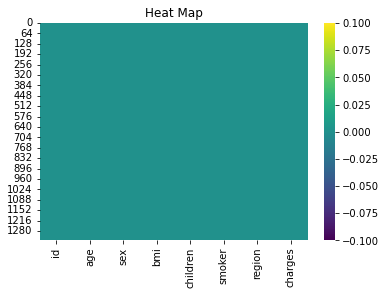

In [4]:
sns.heatmap(df.isnull(), cmap="viridis")
plt.title("Heat Map")

# 

# EDA

# 

# charges (Target)

In [5]:
df.charges.isnull().sum()

0

In [6]:
df.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

Text(0.5, 1.0, 'Histogram of charges')

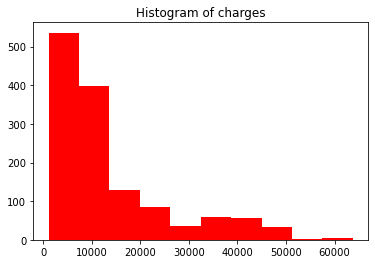

In [7]:
plt.hist(df.charges, color = "red")
plt.title("Histogram of charges")

Text(0.5, 1.0, 'Box of charges')

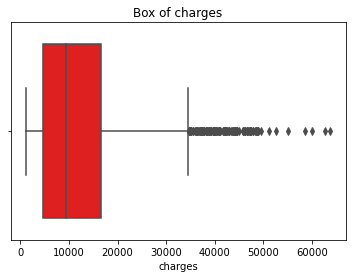

In [8]:
sns.boxplot(df.charges, color="r")
plt.title("Box of charges")

Text(0.5, 1.0, 'Dist plot of charges')

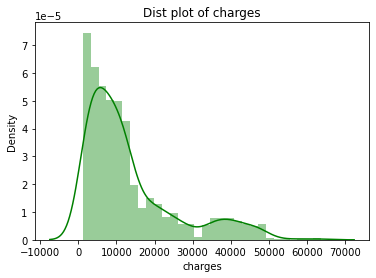

In [9]:
sns.distplot(df.charges, color = "green")
plt.title("Dist plot of charges")

# ID (countinuous)

In [10]:
df.drop(['id'], axis = 1, inplace=True)

In [11]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
df.age.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

# age (countinuous)

In [13]:
df.age.isnull().sum()

0

In [14]:
df.age.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Text(0.5, 1.0, 'Histogram of age')

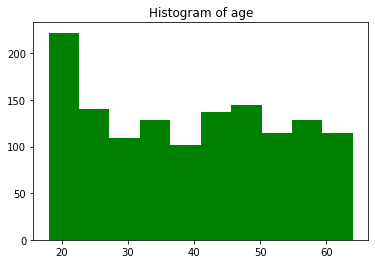

In [15]:
plt.hist(df.age, color = "green")
plt.title("Histogram of age")

Text(0.5, 1.0, 'Dist plot of age')

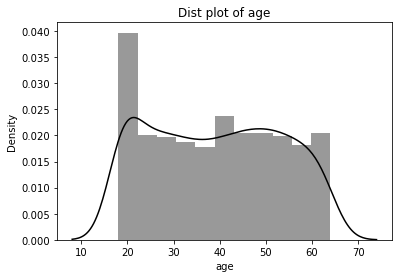

In [16]:
sns.distplot(df.age, color = "black")
plt.title("Dist plot of age")

Text(0.5, 1.0, 'Box plot of age')

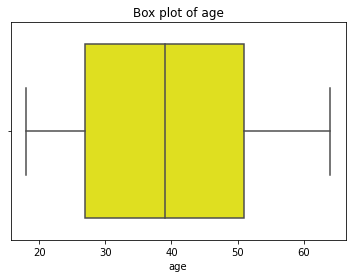

In [17]:
sns.boxplot(df.age, color="yellow")
plt.title("Box plot of age")

Text(0.5, 1.0, 'Scatter plot of age vs charges')

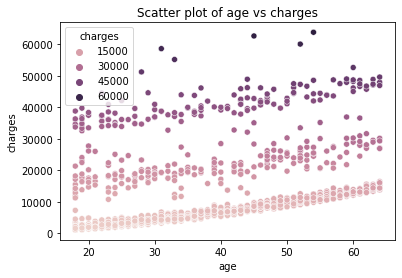

In [18]:
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'charges')
plt.xlabel('age', color = 'black')
plt.ylabel('charges', color = 'black')
plt.title('Scatter plot of age vs charges', color = 'black')

In [19]:
co_rel = df.age.corr(df.charges)
co_rel

0.29900819333064765

# Sex (categorical)

In [20]:
df.sex.isnull().sum()

0

In [21]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Count Plot of sex')

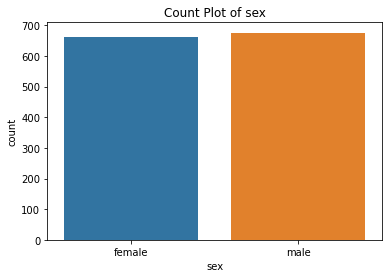

In [22]:
sns.countplot(df.sex)
plt.title("Count Plot of sex")

Text(0.5, 1.0, 'Mean of F & M in SEX')

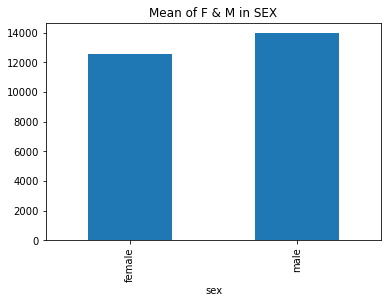

In [23]:
df.groupby('sex')['charges'].mean().plot(kind = 'bar')
plt.title("Mean of F & M in SEX")

In [24]:
df.sex = df.get("sex").replace("female", 0)
df.sex = df.get("sex").replace("male", 1)

Text(0.5, 1.0, 'Count Plot of sex (F=0  &  M=1)')

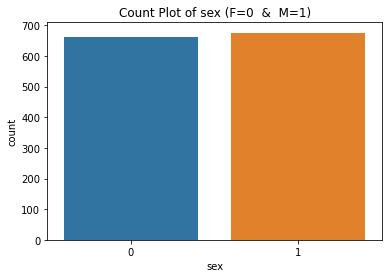

In [25]:
sns.countplot(df.sex)
plt.title("Count Plot of sex (F=0  &  M=1)")

In [26]:
mod = ols('charges ~ sex', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.435902e+08,6.435902e+08,4.399702,0.036133
Residual,1336.0,1.954306e+11,1.462804e+08,NaN,NaN


# BMI (continuous)

In [27]:
df.bmi.isnull().sum()

0

In [28]:
df.bmi.value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

Text(0.5, 1.0, 'Histogram of bmi')

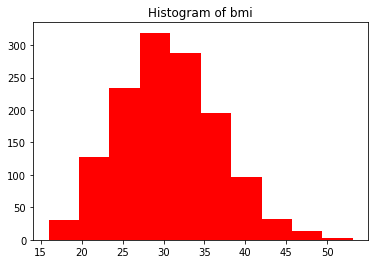

In [29]:
plt.hist(df.bmi, color = "red")
plt.title("Histogram of bmi")

Text(0.5, 1.0, 'Box Plot of bmi')

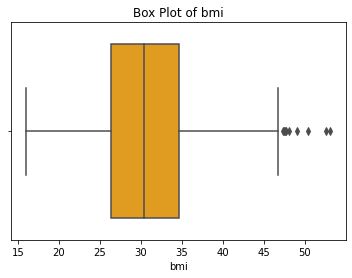

In [30]:
sns.boxplot(df.bmi, color="orange")
plt.title("Box Plot of bmi")

Text(0.5, 1.0, 'Dist plot of bmi')

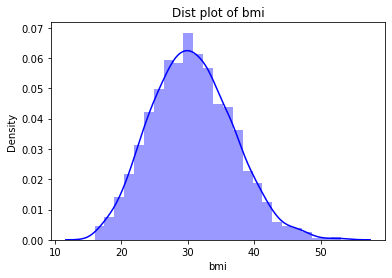

In [31]:
sns.distplot(df.bmi, color = "blue")
plt.title("Dist plot of bmi")

Text(0.5, 1.0, 'Scatter plot of bmi')

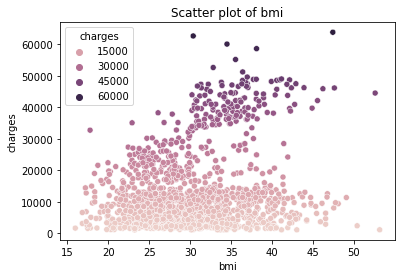

In [32]:
sns.scatterplot(x = 'bmi', y = 'charges', data = df, hue = 'charges')
plt.title("Scatter plot of bmi")

In [33]:
co_rel = df.bmi.corr(df.charges)
co_rel

0.1983409688336289

# Children (continuous)

In [34]:
df.children.isnull().sum()

0

In [35]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Count plot of children')

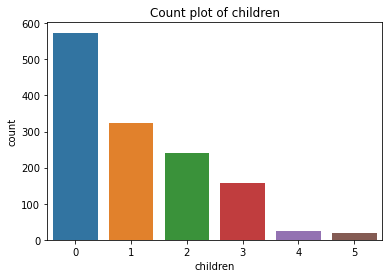

In [36]:
sns.countplot(df.children)
plt.title("Count plot of children")

Text(0.5, 1.0, 'Histogram of children')

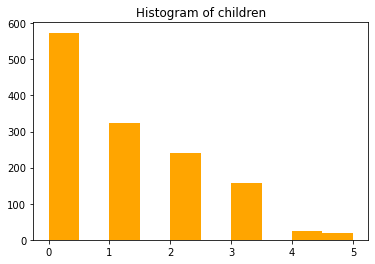

In [37]:
plt.hist(df.children, color = "orange")
plt.title("Histogram of children")

Text(0.5, 1.0, 'Box Plot of children')

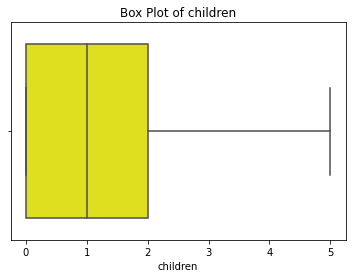

In [38]:
sns.boxplot(df.children, color="yellow")
plt.title("Box Plot of children")

Text(0.5, 1.0, 'Dist plot of children')

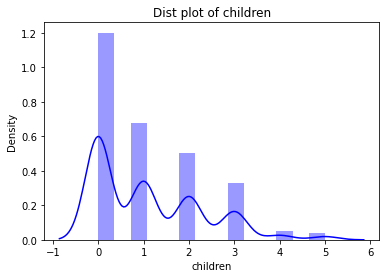

In [39]:
sns.distplot(df.children, color = "blue")
plt.title("Dist plot of children")

Text(0.5, 1.0, 'Scatter plot of children')

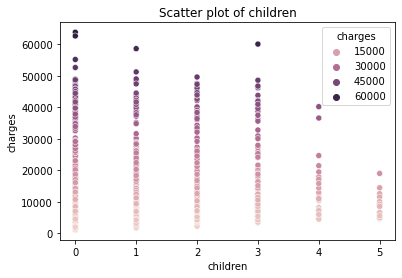

In [40]:
sns.scatterplot(x = 'children', y = 'charges', data = df, hue = 'charges')
plt.title("Scatter plot of children")

In [41]:
co_rel = df.children.corr(df.charges)
co_rel

0.06799822684790487

# smoker (categoricel)

In [42]:
df.smoker.isnull().sum()

0

In [43]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Count plot of smoker')

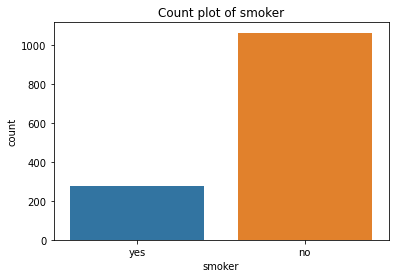

In [44]:
sns.countplot(df.smoker)
plt.title("Count plot of smoker")

Text(0.5, 1.0, 'Mean of yes & no in smoker')

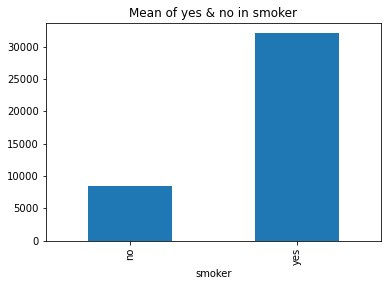

In [45]:
df.groupby('smoker')['charges'].mean().plot(kind = 'bar')
plt.title("Mean of yes & no in smoker")

In [46]:
df.smoker = df.get("smoker").replace("no", 0)
df.smoker = df.get("smoker").replace("yes", 1)

Text(0.5, 1.0, 'Count plot of smoker no=0 & yes=1')

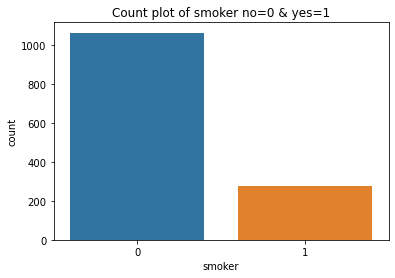

In [47]:
sns.countplot(df.smoker)
plt.title("Count plot of smoker no=0 & yes=1")

In [48]:
mod = ols('charges ~ smoker', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,1.215199e+11,1.215199e+11,2177.614868,8.271436e-283
Residual,1336.0,7.455432e+10,5.580413e+07,NaN,NaN


# region (categorical)

In [49]:
df.region.isnull().sum()

0

In [50]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Count PLot ofRegion')

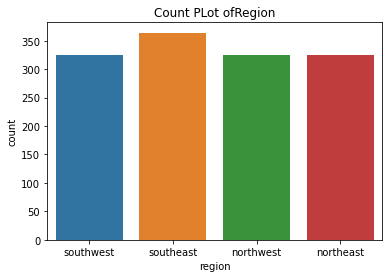

In [51]:
sns.countplot(df.region)
plt.title("Count PLot ofRegion")

Text(0.5, 1.0, 'Mean of regions')

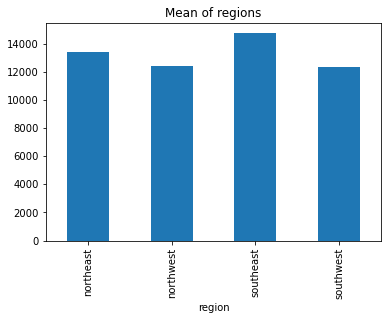

In [52]:
df.groupby('region')['charges'].mean().plot(kind = 'bar')
plt.title("Mean of regions")

In [53]:
df.region = df.get("region").replace("southwest", "south")
df.region = df.get("region").replace("southeast", "south")
df.region = df.get("region").replace("northwest", "north")
df.region = df.get("region").replace("northeast", "north")

Text(0.5, 1.0, 'Count PLot of Region after merging')

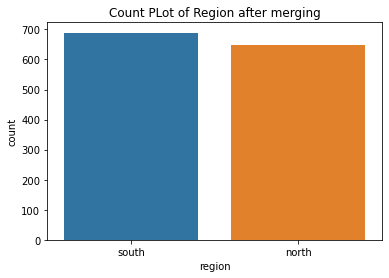

In [54]:
sns.countplot(df.region)
plt.title("Count PLot of Region after merging")

Text(0.5, 1.0, 'Mean of regions')

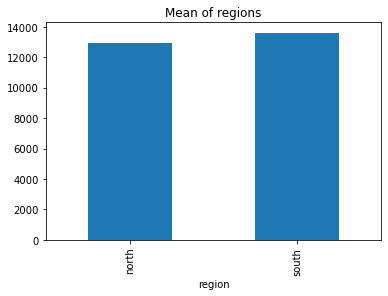

In [55]:
df.groupby('region')['charges'].mean().plot(kind = 'bar')
plt.title("Mean of regions")

In [56]:
df.region = df.get("region").replace("south", 1)
df.region = df.get("region").replace("north", 0)

Text(0.5, 1.0, 'Count PLot of Region north=0 & south=1')

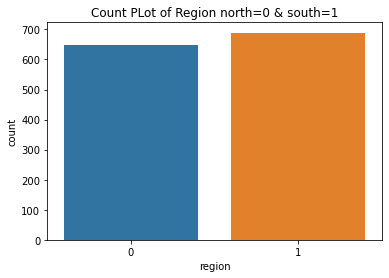

In [57]:
sns.countplot(df.region)
plt.title("Count PLot of Region north=0 & south=1")

In [58]:
mod = ols('charges ~ region', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
region,1.0,1.626163e+08,1.626163e+08,1.108946,0.292502
Residual,1336.0,1.959116e+11,1.466404e+08,NaN,NaN


# Correlation of Charges(Target) with Predictor variables

Text(0.5, 1.0, 'Correlation of Charges(Target) with Predictor variables')

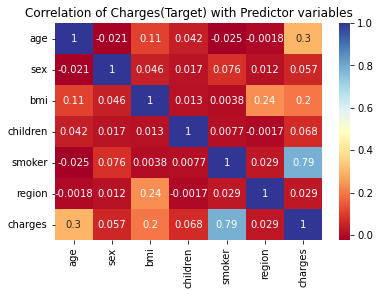

In [59]:
sns.heatmap(df.corr(),annot = True, cmap='RdYlBu')
df.corr()['charges']
plt.title("Correlation of Charges(Target) with Predictor variables")

# 

# SGD regression model

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [61]:
x = df[["age", "bmi", "children"]]
x

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [62]:
y = df.charges

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=7)

In [64]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [65]:
xtrain.shape

(1070, 3)

In [66]:
xtest.shape

(268, 3)

In [67]:
sgdr = SGDRegressor()
sgdr.fit(xtrain,ytrain)

score = sgdr.score(xtrain, ytrain)
print('R-Square: ', score)

R-Square:  0.11103586201934523


In [68]:
y_pred = sgdr.predict(xtest)

In [69]:
mse = mean_squared_error(ytest, y_pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  136912125.87643188
RMSE:  11700.945512070035


# 

In [71]:
pickel_out = open("InsuranceSGDR.pkl", "wb")
pickle.dump(sgdr, pickel_out)
load_m = pickle.load(open("InsuranceSGDR.pkl", "rb"))
results = load_m.score(xtest, ytest)
print(results)

0.14421245644618907
